In [67]:
import numpy as np
from matplotlib import pyplot as plt

x0 = 20
y0 = 20
alpha1 = 1
beta1 = 0.1
alpha2 = 0.5
beta2 = 0.02
t0 = 0
tmax = 80
n = 1000
h = (tmax - t0) / n

def dx(x, y):
    return x * (alpha1 - beta1 * y)

def dy(x, y):
    return y * (-alpha2 + beta2 * x)

def calc_H(x, y):
    if x <= 0 or y <= 0:
        return np.nan
    return beta2 * x + beta1 * y - alpha2 * np.log(x) - alpha1 * np.log(y)

def init_vars():
    nsteps = int((tmax - t0) / h)
    t = np.linspace(t0, tmax, nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    y = np.zeros(nsteps + 1)
    y[0] = y0
    H = np.zeros(nsteps + 1)
    H[0] = calc_H(x0, y0)
    return t, x, y, H

In [68]:
def euler_explicit():
    t, x, y, H = init_vars()
    for k in range(len(t) - 1):
        x[k + 1] = x[k] + h * x[k] * (alpha1 - beta1 * y[k])
        y[k + 1] = y[k] + h * y[k] * (-alpha2 + beta2 * x[k])
        H[k + 1] = calc_H(x[k + 1], y[k + 1])
    return t, x, y, H

def euler_implicit():
    t, x, y, H = init_vars()
    for k in range(len(t) - 1):
        x[k + 1] = x[k] / (1 + h * (-alpha1 + beta1 * y[k]))
        y[k + 1] = y[k] / (1 + h * (alpha2 - beta2 * x[k]))
        H[k + 1] = calc_H(x[k + 1], y[k + 1])
    return t, x, y, H

def euler_half_explicit():
    t, x, y, H = init_vars()
    for k in range(len(t) - 1):
        x[k + 1] = x[k] / (1 + h * (-alpha1 + beta1 * y[k]))
        y[k + 1] = y[k] + h * y[k] * (-alpha2 + beta2 * x[k])
        H[k + 1] = calc_H(x[k + 1], y[k + 1])
    return t, x, y, H

def runge_kutta_4():
    t, x, y, H = init_vars()
    for k in range(len(t) - 1):
        kx1 = dx(x[k], y[k])
        kx2 = dx(x[k] + h / 2, y[k] + h * kx1 / 2)
        kx3 = dx(x[k] + h / 2, y[k] + h * kx2 / 2)
        kx4 = dx(x[k] + h, y[k] + h * kx3)
        x[k + 1] = x[k] + (h / 6) * (kx1 + 2 * kx2 + 2 * kx3 + kx4)

        ky1 = dy(x[k], y[k])
        ky2 = dy(x[k] + h / 2, y[k] + h * ky1 / 2)
        ky3 = dy(x[k] + h / 2, y[k] + h * ky2 / 2)
        ky4 = dy(x[k] + h, y[k] + h * ky3)
        y[k + 1] = y[k] + (h / 6) * (ky1 + 2 * ky2 + 2 * ky3 + ky4)

        H[k + 1] = calc_H(x[k + 1], y[k + 1])
    return t, x, y, H

In [69]:
def plot(function, label_x, label_y, color=None):
    t_vec, y_vec, x_vec, _ = function()
    plt.plot(t_vec, x_vec, label=label_x, color=color)
    plt.plot(t_vec, y_vec, label=label_y, color=color)


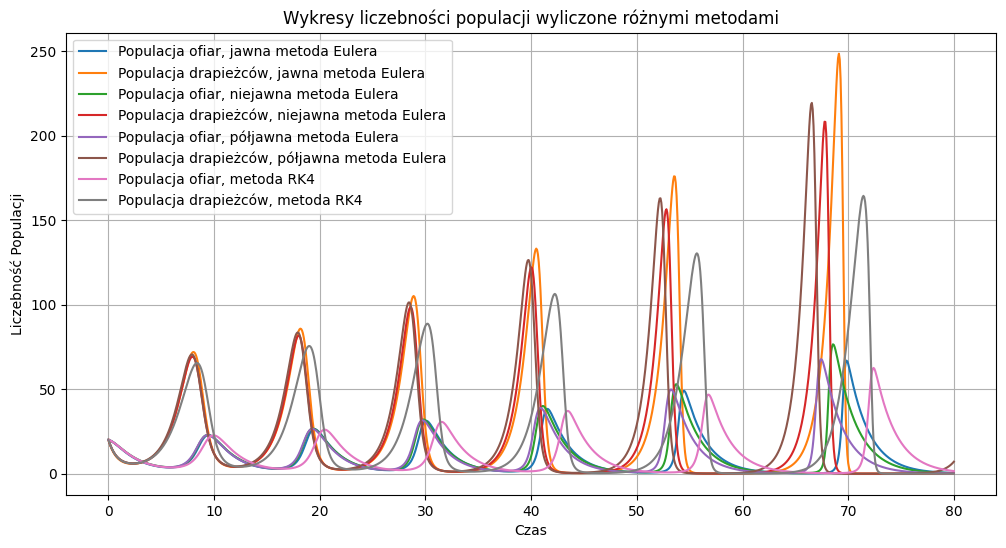

In [70]:
plt.figure(figsize=(12, 6))
plt.title("Wykresy liczebności populacji wyliczone różnymi metodami")
plot(euler_explicit, "Populacja ofiar, jawna metoda Eulera", "Populacja drapieżców, jawna metoda Eulera")
plot(euler_implicit, "Populacja ofiar, niejawna metoda Eulera", "Populacja drapieżców, niejawna metoda Eulera")
plot(euler_half_explicit, "Populacja ofiar, półjawna metoda Eulera", "Populacja drapieżców, półjawna metoda Eulera")
plot(runge_kutta_4, "Populacja ofiar, metoda RK4", "Populacja drapieżców, metoda RK4")
plt.xlabel('Czas')
plt.ylabel('Liczebność Populacji')
plt.legend()
plt.grid(True)
plt.show()

(x,y)=(0,0) lub (x,y)=(alpha2/beta2,alpha1/beta1)

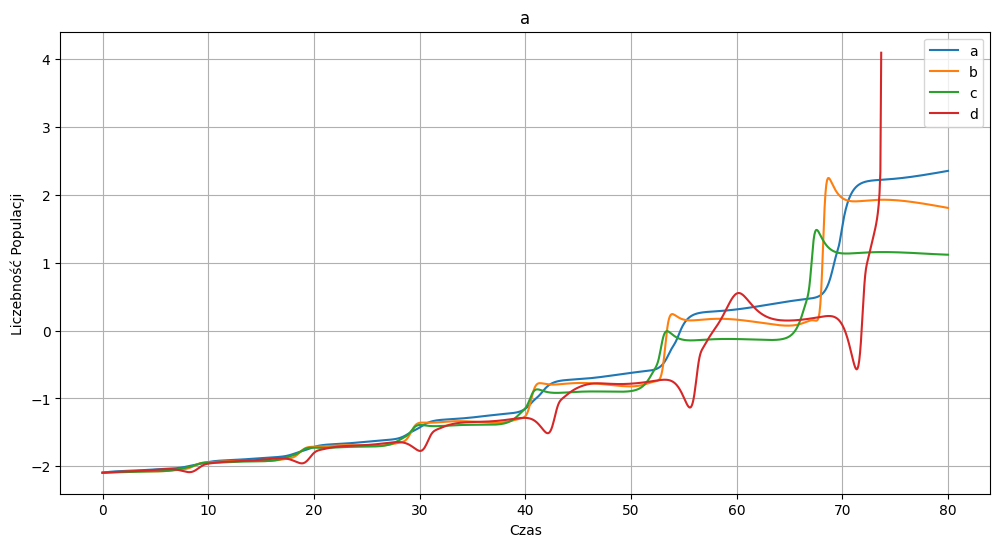

In [71]:
t_vec, _, _, H_euler_explicit = euler_explicit()
H_euler_implicit = euler_implicit()[3]
H_euler_half_explicit = euler_half_explicit()[3]
H_runge_kutta_4 = runge_kutta_4()[3]

plt.figure(figsize=(12, 6))
plt.title("a")
plt.plot(t_vec, H_euler_explicit, label="a")
plt.plot(t_vec, H_euler_implicit, label="b")
plt.plot(t_vec, H_euler_half_explicit, label="c")
plt.plot(t_vec, H_runge_kutta_4, label="d")
plt.xlabel('Czas')
plt.ylabel('Liczebność Populacji')
plt.legend()
plt.grid(True)
plt.show()